In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
dfs = {}

df = pd.read_csv('~/Downloads/educ2010.txt',sep='\t',engine='python')
df = df[['P6160', 'P8586','P6219', 'P6219S1','P6213']]
df.rename(columns={'P6160':'leer_escrib','P8586':'estudia','P6219':'nivel_educ',
                       'P6219S1':'grado_term','P6213':'grado_cursa'},inplace=True)
dfs[2010] = df

df = pd.read_csv('~/Downloads/educ2011.txt',sep='\t',engine='python')
df = df[['P6160', 'P8586','P6219', 'P6219S1','P6213']]
df.rename(columns={'P6160':'leer_escrib','P8586':'estudia','P6219':'nivel_educ',
                       'P6219S1':'grado_term','P6213':'grado_cursa'},inplace=True)
dfs[2011] = df

df = pd.read_csv('~/Downloads/educ2012.txt',sep='\t',engine='python')
df = df[['P6160', 'P8586','P8587', 'P8587s1','P1088']]
df.rename(columns={'P6160':'leer_escrib','P8586':'estudia','P8587':'nivel_educ',
                   'P8587s1':'grado_term','P1088':'grado_cursa'},inplace=True)
dfs[2012] = df

df = pd.read_csv('~/Downloads/educ2013.txt',sep='\t',engine='python')
df = df[['P6160', 'P8586','P8587', 'P8587s1','P1088']]
df.rename(columns={'P6160':'leer_escrib','P8586':'estudia','P8587':'nivel_educ',
                   'P8587s1':'grado_term','P1088':'grado_cursa'},inplace=True)
dfs[2013] = df

df = pd.read_csv('~/Downloads/educ2014.txt',sep='\t',engine='python')
df = df[['P6160', 'P8586','P8587', 'P8587S1','P1088']]
df.rename(columns={'P6160':'leer_escrib','P8586':'estudia','P8587':'nivel_educ',
                   'P8587S1':'grado_term','P1088':'grado_cursa'},inplace=True)
dfs[2014] = df

df = pd.read_csv('~/Downloads/educ2015.txt',sep='\t',engine='python')
df = df[['P6160', 'P8586','P8587', 'P8587S1','P1088']]
df.rename(columns={'P6160':'leer_escrib','P8586':'estudia','P8587':'nivel_educ',
                   'P8587S1':'grado_term','P1088':'grado_cursa'},inplace=True)
dfs[2015] = df

df = pd.read_csv('~/Downloads/educ2016.txt',sep='\t',engine='python')
df = df[['P6160', 'P8586','P8587', 'P8587S1','P1088']]
df.rename(columns={'P6160':'leer_escrib','P8586':'estudia','P8587':'nivel_educ',
                   'P8587S1':'grado_term','P1088':'grado_cursa'},inplace=True)
dfs[2016] = df

df = pd.read_csv('~/Downloads/educ2017.csv',sep=';')
df = df[['P6160', 'P8586','P8587', 'P8587S1','P1088']]
df.rename(columns={'P6160':'leer_escrib','P8586':'estudia','P8587':'nivel_educ',
                       'P8587S1':'grado_term','P1088':'grado_cursa'},inplace=True)

dfs[2017] = df

df = pd.read_csv('~/Downloads/educ2018.csv',sep=';')
df = df[['P6160', 'P8586','P8587', 'P8587S1','P1088']]
df.rename(columns={'P6160':'leer_escrib','P8586':'estudia','P8587':'nivel_educ',
                       'P8587S1':'grado_term','P1088':'grado_cursa'},inplace=True)
dfs[2018] = df

df = pd.read_csv('~/Downloads/educ2019.csv',sep=';')
df = df[['P6160', 'P8586','P8587', 'P8587S1','P1088']]
df.rename(columns={'P6160':'leer_escrib','P8586':'estudia','P8587':'nivel_educ',
                       'P8587S1':'grado_term','P1088':'grado_cursa'},inplace=True)
dfs[2019] = df

In [62]:
#Merge all datasets
df = None
for key in dfs.keys():
    dfs[key]['year'] = key
    df = pd.concat([df,dfs[key]])
df = df.replace([' '],[np.nan])
df = df.astype(float)
df.to_csv('../Data/Extra/ENCV_Educacion.csv')
df.head()

,leer_escrib,estudia,nivel_educ,grado_term,grado_cursa,year
0,1.0,2.0,3.0,5.0,NaN,2010.0
1,1.0,2.0,5.0,10.0,NaN,2010.0
2,1.0,2.0,5.0,11.0,NaN,2010.0
3,1.0,2.0,3.0,1.0,NaN,2010.0
4,1.0,2.0,5.0,11.0,NaN,2010.0


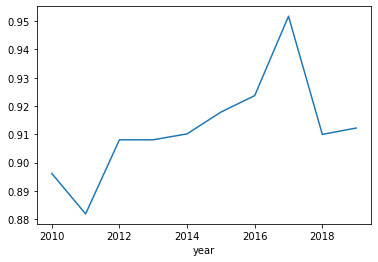

In [45]:
ratio_lee = df.groupby('year').apply(lambda x: x[x['leer_escrib']==1].shape[0]/x.shape[0]).plot()

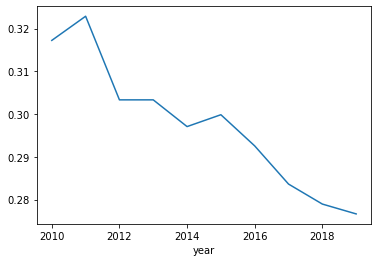

In [46]:
ratio_estudia = df.groupby('year').apply(lambda x: x[x['estudia']==1].shape[0]/x.shape[0]).plot()

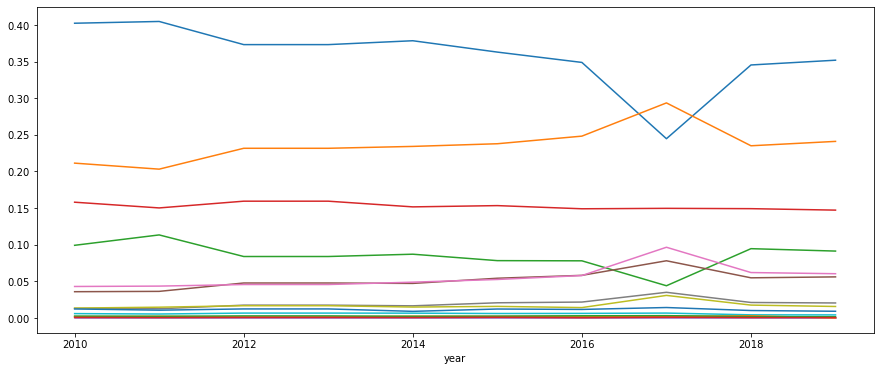

In [58]:
fig,ax = plt.subplots(figsize=(15,6))

for i in df['nivel_educ'].unique():
    f = lambda x: x[x['nivel_educ']==i].shape[0]/x['nivel_educ'].dropna().shape[0]
    nivel_educ = df.groupby('year').apply(f).plot(ax=ax)

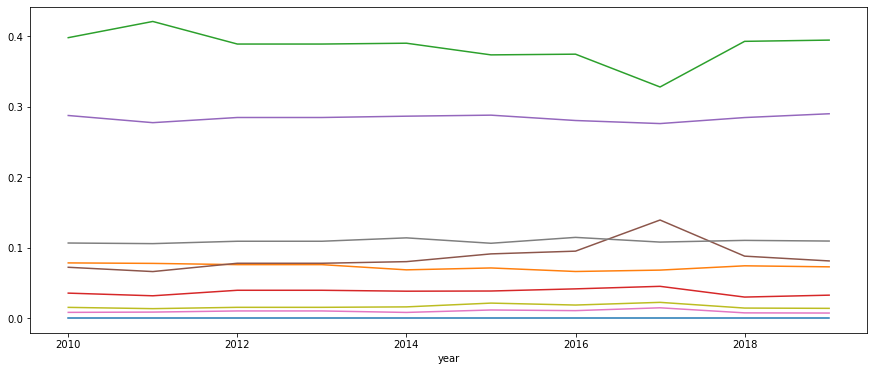

In [57]:
fig,ax = plt.subplots(figsize=(15,6))

for i in df['grado_cursa'].unique():
    f = lambda x: x[x['grado_cursa']==i].shape[0]/x['grado_cursa'].dropna().shape[0]
    nivel_educ = df.groupby('year').apply(f).plot(ax=ax)

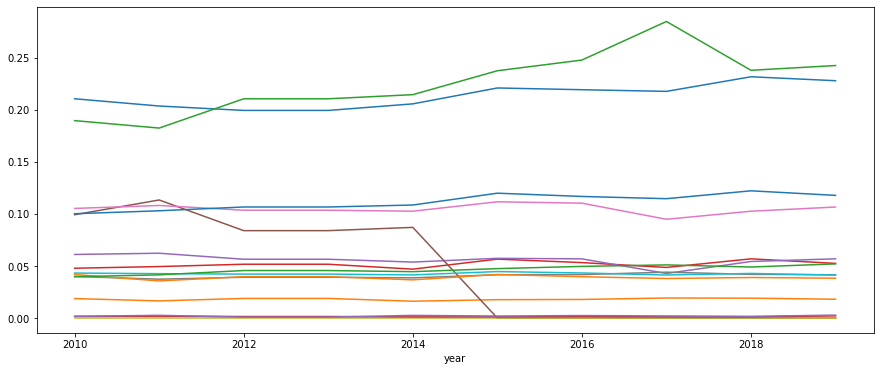

In [60]:
fig,ax = plt.subplots(figsize=(15,6))

for i in df['grado_term'].unique():
    f = lambda x: x[x['grado_term']==i].shape[0]/x['grado_term'].dropna().shape[0]
    nivel_educ = df.groupby('year').apply(f).plot(ax=ax)

In [63]:
df

,leer_escrib,estudia,nivel_educ,grado_term,grado_cursa,year
0,1.0,2.0,3.0,5.0,NaN,2010.0
1,1.0,2.0,5.0,10.0,NaN,2010.0
2,1.0,2.0,5.0,11.0,NaN,2010.0
3,1.0,2.0,3.0,1.0,NaN,2010.0
4,1.0,2.0,5.0,11.0,NaN,2010.0
...,...,...,...,...,...,...
266621,1.0,2.0,11.0,5.0,NaN,2019.0
266622,1.0,1.0,NaN,NaN,2.0,2019.0
266623,1.0,2.0,5.0,11.0,NaN,2019.0
266624,1.0,1.0,NaN,NaN,3.0,2019.0
